<a href="https://colab.research.google.com/github/shariq101/NLP-Shakespearean_word_Gen/blob/main/Text_Classification_problem_glove_Embedding_trainable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [ ]:
from keras.preprocessing.text import Tokenizer

MAX_NB_WORDS = 20000

# get the raw text data
texts_train = newsgroups_train["data"]
texts_test = newsgroups_test["data"]

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 134142 unique tokens.


In [ ]:
sequences[0]

[14,
 4308,
 1350,
 15,
 11126,
 38,
 250,
 29,
 42,
 298,
 9,
 17,
 95,
 78,
 91,
 4308,
 1350,
 15,
 34,
 77,
 3,
 2952,
 610,
 1767,
 32,
 211,
 8,
 26,
 1308,
 27,
 171,
 66,
 47,
 123,
 9879,
 63,
 16,
 17,
 298,
 8,
 708,
 1,
 86,
 263,
 11,
 26,
 4,
 36,
 1497,
 2266,
 298,
 1162,
 2,
 18,
 14,
 1,
 1347,
 13637,
 843,
 15448,
 11,
 26,
 337,
 4,
 1,
 4017,
 80,
 182,
 484,
 7,
 1376,
 1,
 844,
 8164,
 26,
 1835,
 14,
 1,
 816,
 3,
 1,
 726,
 17,
 9,
 44,
 8,
 88,
 27,
 171,
 39,
 4,
 828,
 273,
 1078,
 2908,
 198,
 3,
 2804,
 153,
 17,
 298,
 9,
 239,
 628,
 25,
 808,
 357,
 13,
 21,
 16,
 17,
 384,
 298,
 181,
 112,
 188,
 206,
 1498,
 1341,
 2,
 13,
 35,
 58,
 7860]

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 134142)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

" ".join([index_to_word[i] for i in sequences[0]])


"from wam umd edu where's my thing subject what car is this nntp posting host wam umd edu organization university of maryland college park lines 15 i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can a model name engine specs years of production where this car is made history or whatever info you have on this looking car please e mail thanks il brought to you by your neighborhood"

average length: 302.5
max length: 15365


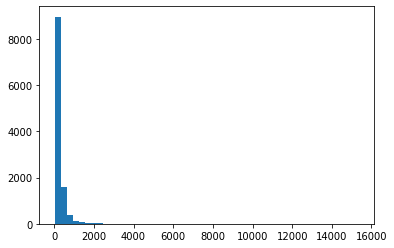

In [ ]:

seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

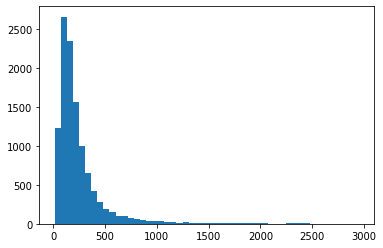

In [ ]:
plt.hist([l for l in seq_lens if l < 3000], bins=50);

In [ ]:
from keras_preprocessing.sequence import pad_sequences


MAX_SEQUENCE_LENGTH = 1000

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (11314, 1000)
Shape of data test tensor: (7532, 1000)


In [ ]:
from keras.utils.np_utils import to_categorical
y_train = newsgroups_train["target"]
y_test = newsgroups_test["target"]

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (11314, 20)



1.   Build an embedding layer mapping each word to a vector representation
2.   Compute the vector representation of all words in each sequence and average them
3. Add a dense layer to output 20 classes (+ softmax)

In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
N_CLASSES = 20

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128)

Epoch 1/10
80/80 [==============================] - 5s 57ms/step - loss: 2.9872 - acc: 0.0881 - val_loss: 2.9804 - val_acc: 0.1060
Epoch 2/10
80/80 [==============================] - 4s 53ms/step - loss: 2.9649 - acc: 0.1253 - val_loss: 2.9568 - val_acc: 0.1873
Epoch 3/10
80/80 [==============================] - 4s 53ms/step - loss: 2.9338 - acc: 0.1909 - val_loss: 2.9235 - val_acc: 0.2049
Epoch 4/10
80/80 [==============================] - 4s 53ms/step - loss: 2.8945 - acc: 0.2120 - val_loss: 2.8824 - val_acc: 0.2191
Epoch 5/10
80/80 [==============================] - 4s 53ms/step - loss: 2.8522 - acc: 0.2587 - val_loss: 2.8393 - val_acc: 0.2482
Epoch 6/10
80/80 [==============================] - 4s 53ms/step - loss: 2.8071 - acc: 0.2501 - val_loss: 2.7944 - val_acc: 0.2845
Epoch 7/10
80/80 [==============================] - 4s 54ms/step - loss: 2.7568 - acc: 0.3281 - val_loss: 2.7443 - val_acc: 0.3251
Epoch 8/10
80/80 [==============================] - 4s 53ms/step - loss: 2.7002 - a

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))


236/236 [==============================] - 1s 6ms/step
test accuracy: 0.4094530005310674


In [ ]:
from keras.layers import LSTM, Conv1D, MaxPooling1D

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = LSTM(64)(x)
predictions = Dense(20, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# A 1D convolution with 128 output channels
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
# A 1D convolution with 64 output channels
x = Conv1D(64, 5, activation='relu')(x)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Flatten()(x)

predictions = Dense(20, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128)

Epoch 1/10
80/80 [==============================] - 82s 1s/step - loss: 1.9083 - acc: 0.3901 - val_loss: 1.2399 - val_acc: 0.6343
Epoch 2/10
80/80 [==============================] - 79s 986ms/step - loss: 0.8051 - acc: 0.7545 - val_loss: 0.8673 - val_acc: 0.7385
Epoch 3/10
80/80 [==============================] - 77s 966ms/step - loss: 0.4725 - acc: 0.8591 - val_loss: 0.6786 - val_acc: 0.8039
Epoch 4/10
80/80 [==============================] - 78s 969ms/step - loss: 0.3029 - acc: 0.9104 - val_loss: 0.6499 - val_acc: 0.8198
Epoch 5/10
80/80 [==============================] - 78s 978ms/step - loss: 0.2046 - acc: 0.9415 - val_loss: 0.6651 - val_acc: 0.8224
Epoch 6/10
80/80 [==============================] - 82s 1s/step - loss: 0.1402 - acc: 0.9611 - val_loss: 0.6286 - val_acc: 0.8445
Epoch 7/10
80/80 [==============================] - 78s 975ms/step - loss: 0.1042 - acc: 0.9724 - val_loss: 0.6557 - val_acc: 0.8339
Epoch 8/10
80/80 [==============================] - 78s 975ms/step - loss: 

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 15s 65ms/step
test accuracy: 0.7857142857142857


In [ ]:
embeddings_index = {}
embeddings_vectors = []
f = open('glove.6B.100d.txt', 'rb')

word_idx = 0
for line in f:
    values = line.decode('utf-8').split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = word_idx
    embeddings_vectors.append(vector)
    word_idx = word_idx + 1
f.close()

inv_index = {v: k for k, v in embeddings_index.items()}
print("found %d different words in the file" % word_idx)

found 400000 different words in the file


In [ ]:
# Stack all embeddings in a large numpy array
glove_embeddings = np.vstack(embeddings_vectors)
glove_norms = np.linalg.norm(glove_embeddings, axis=-1, keepdims=True)
glove_embeddings_normed = glove_embeddings / glove_norms
print(glove_embeddings.shape)

(400000, 100)


In [ ]:
def get_emb(word):
    idx = embeddings_index.get(word)
    if idx is None:
        return None
    else:
        return glove_embeddings[idx]

    
def get_normed_emb(word):
    idx = embeddings_index.get(word)
    if idx is None:
        return None
    else:
        return glove_embeddings_normed[idx]

In [ ]:
get_emb("computer")


array([-1.6298e-01,  3.0141e-01,  5.7978e-01,  6.6548e-02,  4.5835e-01,
       -1.5329e-01,  4.3258e-01, -8.9215e-01,  5.7747e-01,  3.6375e-01,
        5.6524e-01, -5.6281e-01,  3.5659e-01, -3.6096e-01, -9.9662e-02,
        5.2753e-01,  3.8839e-01,  9.6185e-01,  1.8841e-01,  3.0741e-01,
       -8.7842e-01, -3.2442e-01,  1.1202e+00,  7.5126e-02,  4.2661e-01,
       -6.0651e-01, -1.3893e-01,  4.7862e-02, -4.5158e-01,  9.3723e-02,
        1.7463e-01,  1.0962e+00, -1.0044e+00,  6.3889e-02,  3.8002e-01,
        2.1109e-01, -6.6247e-01, -4.0736e-01,  8.9442e-01, -6.0974e-01,
       -1.8577e-01, -1.9913e-01, -6.9226e-01, -3.1806e-01, -7.8565e-01,
        2.3831e-01,  1.2992e-01,  8.7721e-02,  4.3205e-01, -2.2662e-01,
        3.1549e-01, -3.1748e-01, -2.4632e-03,  1.6615e-01,  4.2358e-01,
       -1.8087e+00, -3.6699e-01,  2.3949e-01,  2.5458e+00,  3.6111e-01,
        3.9486e-02,  4.8607e-01, -3.6974e-01,  5.7282e-02, -4.9317e-01,
        2.2765e-01,  7.9966e-01,  2.1428e-01,  6.9811e-01,  1.12

In [ ]:
# %load solutions/most_similar.py
def most_similar(words, topn=10):
    query_emb = 0
    # If we have a list of words instead of one word
    # (bonus question)
    if type(words) == list:
        for word in words:
            query_emb += get_emb(word)       
    else:
        query_emb = get_emb(words)
        
    query_emb = query_emb / np.linalg.norm(query_emb)
    
    # Large numpy vector with all cosine similarities
    # between emb and all other words
    cosines = np.dot(glove_embeddings_normed, query_emb)
    
    # topn most similar indexes corresponding to cosines
    idxs = np.argsort(cosines)[::-1][:topn]
    
    # pretty return with word and similarity
    return [(inv_index[idx], cosines[idx]) for idx in idxs]


     

most_similar("cpu")

[('cpu', 0.99999994),
 ('processor', 0.77934384),
 ('cpus', 0.7651844),
 ('microprocessor', 0.73606336),
 ('processors', 0.67348146),
 ('motherboard', 0.66757727),
 ('x86', 0.6655922),
 ('pentium', 0.64758503),
 ('gpu', 0.6448882),
 ('z80', 0.6404979)]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


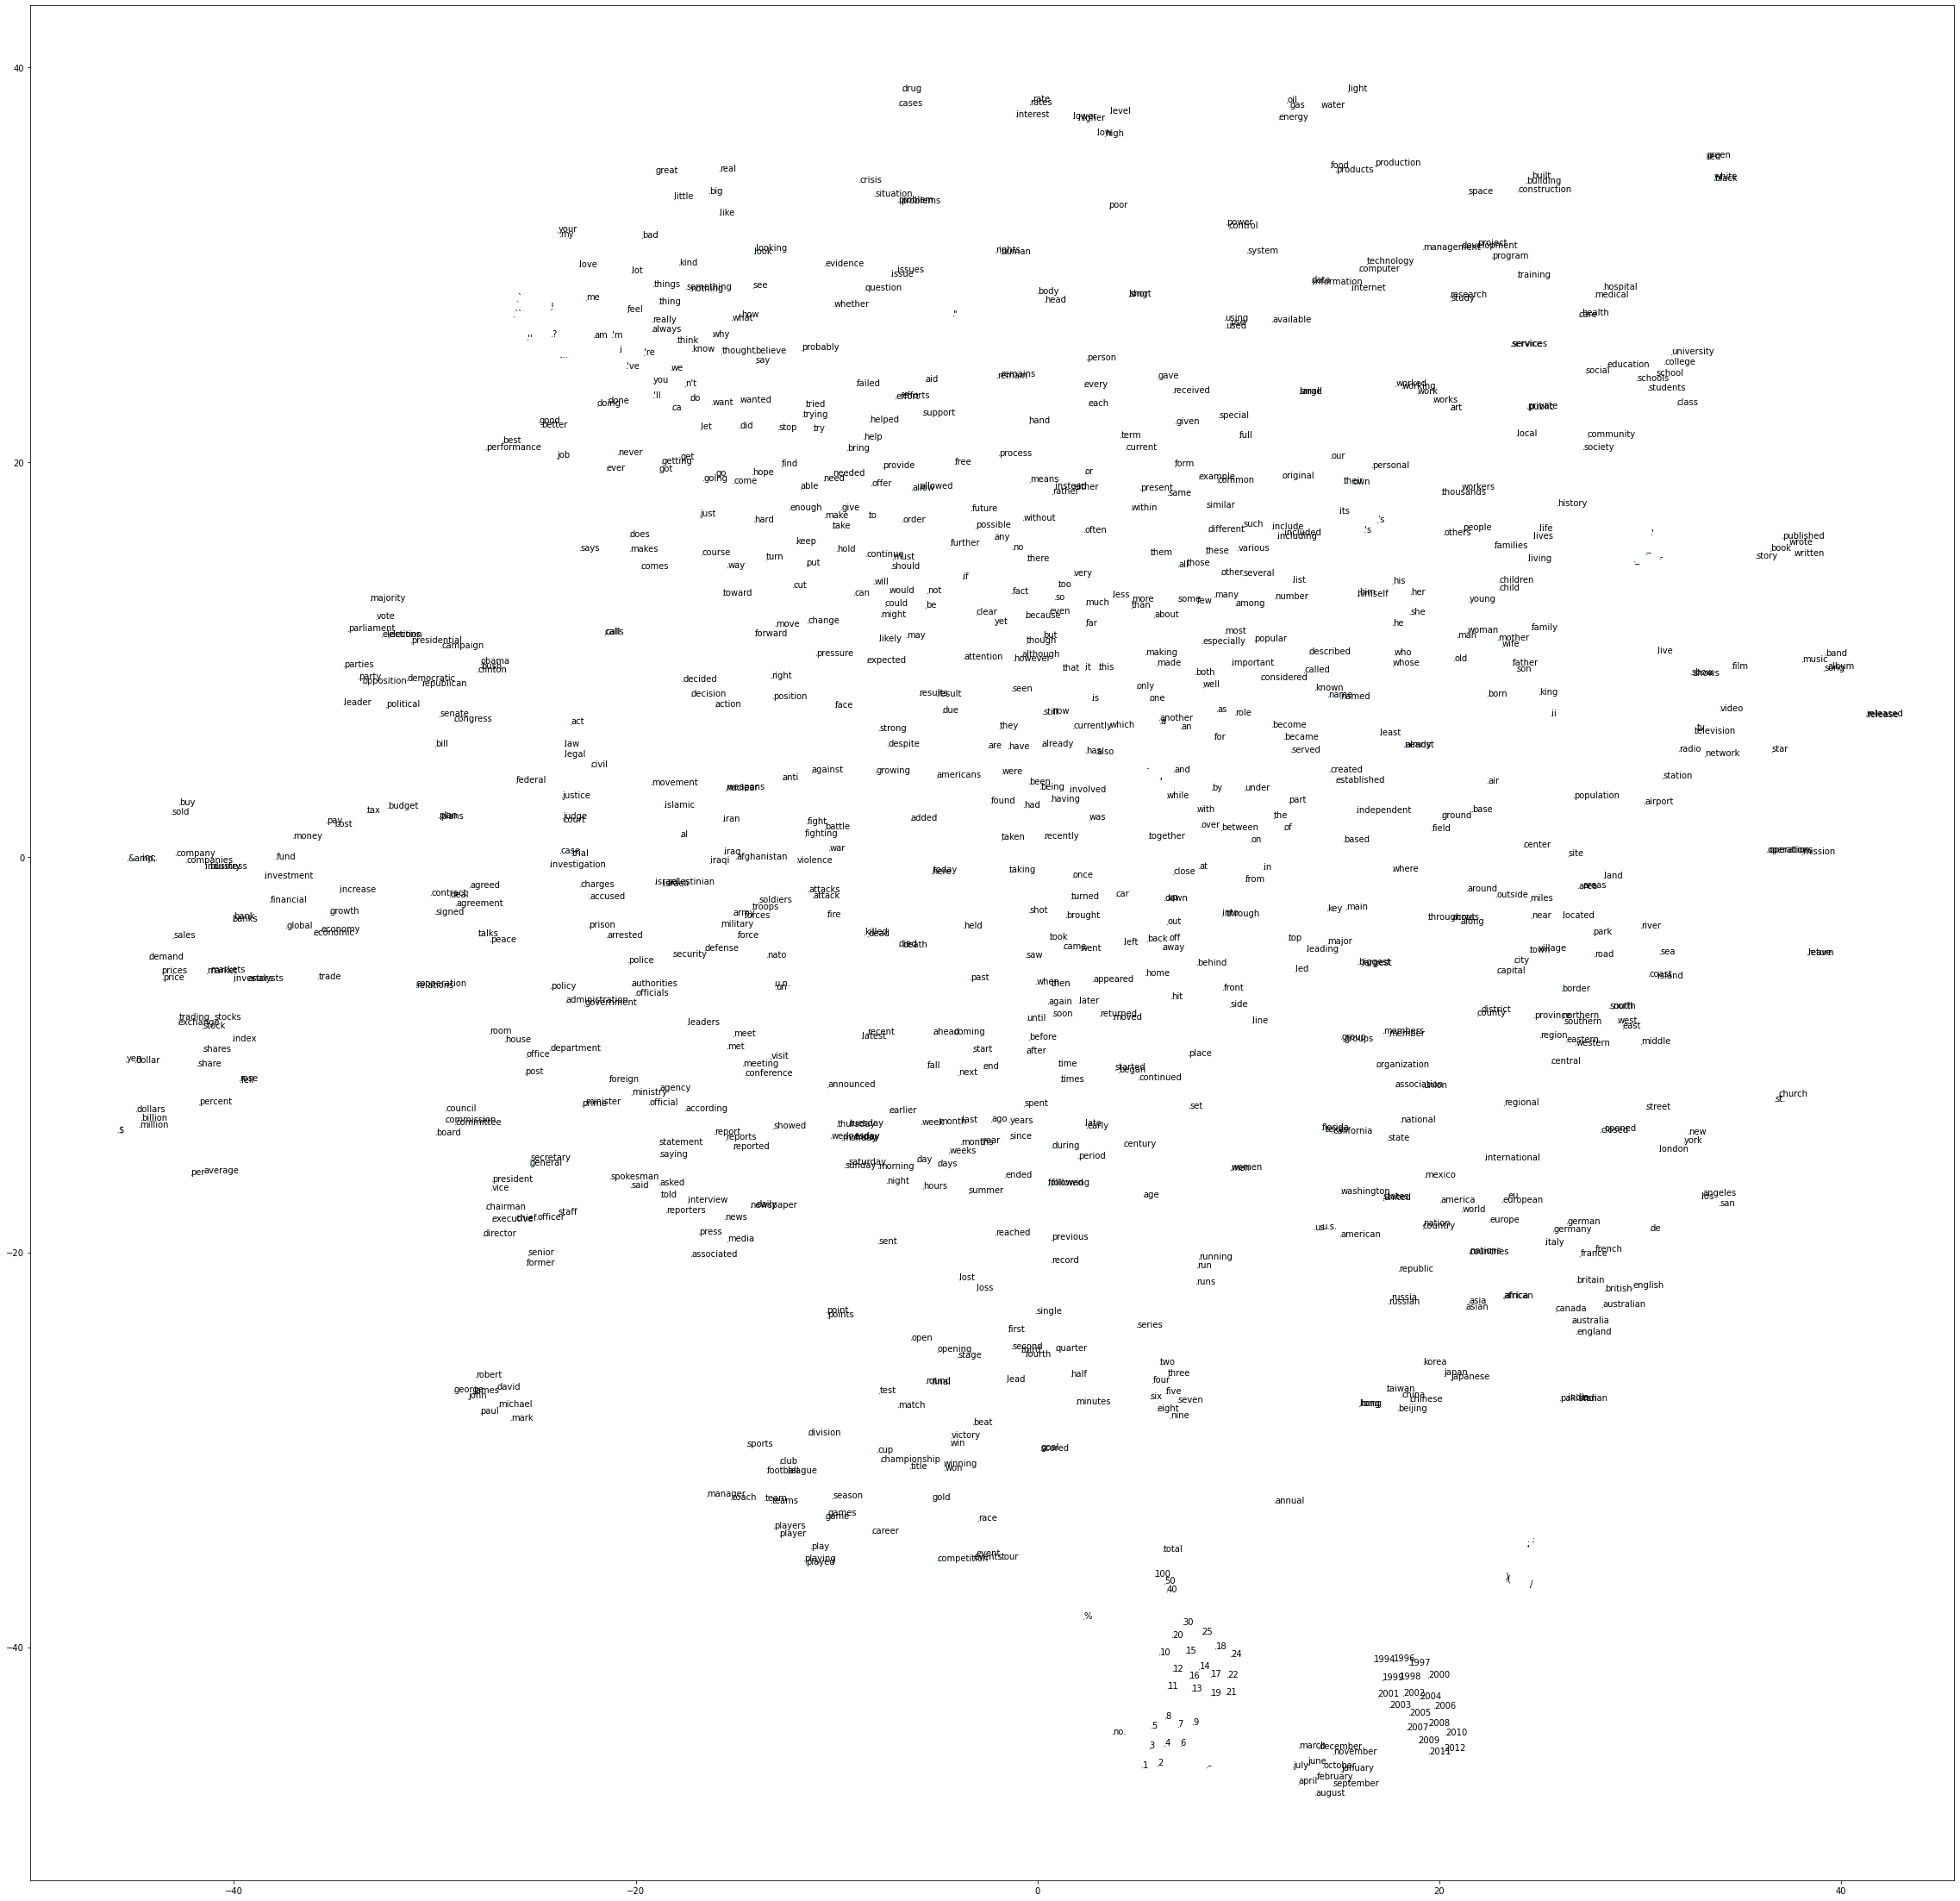

In [ ]:
from sklearn.manifold import TSNE

word_emb_tsne = TSNE(perplexity=30).fit_transform(glove_embeddings_normed[:1000])


     

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
axis = plt.gca()
np.set_printoptions(suppress=True)
plt.scatter(word_emb_tsne[:, 0], word_emb_tsne[:, 1], marker=".", s=1)

for idx in range(1000):
    plt.annotate(inv_index[idx],
                 xy=(word_emb_tsne[idx, 0], word_emb_tsne[idx, 1]),
                 xytext=(0, 0), textcoords='offset points')
plt.savefig("tsne.png")
plt.show()

In [ ]:
EMBEDDING_DIM = 100

# prepare embedding matrix
nb_words_in_matrix = 0
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = get_emb(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        nb_words_in_matrix = nb_words_in_matrix + 1
        
print("added %d words in the embedding matrix" % nb_words_in_matrix)

added 17401 words in the embedding matrix


In [ ]:
pretrained_embedding_layer = Embedding(
    MAX_NB_WORDS, EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_SEQUENCE_LENGTH,trainable=True
)


In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = pretrained_embedding_layer(sequence_input)
average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)

# We don't want to fine-tune embeddings
model.layers[1].trainable=True

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])


     

model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128)

# Note, on this type of task, this technique will 
# degrade results as we train much less parameters
# and we average a large number pre-trained embeddings.
# You will notice much less overfitting then!
# Using convolutions / LSTM will help
# It is also advisable to treat seperately pre-trained
# embeddings and words out of vocabulary.


Epoch 1/10
80/80 [==============================] - 8s 93ms/step - loss: 2.9604 - acc: 0.0984 - val_loss: 2.9221 - val_acc: 0.1246
Epoch 2/10
80/80 [==============================] - 6s 79ms/step - loss: 2.8947 - acc: 0.1640 - val_loss: 2.8683 - val_acc: 0.1811
Epoch 3/10
80/80 [==============================] - 6s 79ms/step - loss: 2.8430 - acc: 0.2091 - val_loss: 2.8229 - val_acc: 0.2641
Epoch 4/10
80/80 [==============================] - 6s 80ms/step - loss: 2.7930 - acc: 0.2619 - val_loss: 2.7729 - val_acc: 0.2924
Epoch 5/10
80/80 [==============================] - 7s 83ms/step - loss: 2.7377 - acc: 0.3205 - val_loss: 2.7178 - val_acc: 0.3233
Epoch 6/10
80/80 [==============================] - 6s 79ms/step - loss: 2.6744 - acc: 0.3602 - val_loss: 2.6554 - val_acc: 0.3710
Epoch 7/10
80/80 [==============================] - 6s 80ms/step - loss: 2.6028 - acc: 0.3940 - val_loss: 2.5858 - val_acc: 0.4170
Epoch 8/10
80/80 [==============================] - 6s 81ms/step - loss: 2.5242 - a

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 2s 9ms/step
test accuracy: 0.4731810939989379


In [ ]:
from keras.layers import LSTM, Conv1D, MaxPooling1D

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = pretrained_embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = LSTM(64)(x)
predictions = Dense(20, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128)

Epoch 1/10
80/80 [==============================] - 85s 1s/step - loss: 1.8456 - acc: 0.4480 - val_loss: 1.1646 - val_acc: 0.6413
Epoch 2/10
80/80 [==============================] - 82s 1s/step - loss: 0.8055 - acc: 0.7562 - val_loss: 0.7440 - val_acc: 0.7783
Epoch 3/10
80/80 [==============================] - 79s 983ms/step - loss: 0.4982 - acc: 0.8626 - val_loss: 0.6086 - val_acc: 0.8163
Epoch 4/10
80/80 [==============================] - 78s 975ms/step - loss: 0.3334 - acc: 0.9114 - val_loss: 0.5369 - val_acc: 0.8339
Epoch 5/10
80/80 [==============================] - 80s 996ms/step - loss: 0.2804 - acc: 0.9258 - val_loss: 0.5380 - val_acc: 0.8410
Epoch 6/10
80/80 [==============================] - 79s 988ms/step - loss: 0.1794 - acc: 0.9560 - val_loss: 0.5077 - val_acc: 0.8534
Epoch 7/10
80/80 [==============================] - 78s 974ms/step - loss: 0.1321 - acc: 0.9698 - val_loss: 0.4424 - val_acc: 0.8675
Epoch 8/10
80/80 [==============================] - 78s 971ms/step - loss: 

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 19s 74ms/step
test accuracy: 0.798858204992034


In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = pretrained_embedding_layer(sequence_input)

# A 1D convolution with 128 output channels
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
# A 1D convolution with 64 output channels
x = Conv1D(64, 5, activation='relu')(x)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Flatten()(x)

predictions = Dense(20, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128)

Epoch 1/10
80/80 [==============================] - 126s 2s/step - loss: 1.9148 - acc: 0.3797 - val_loss: 1.2372 - val_acc: 0.6254
Epoch 2/10
80/80 [==============================] - 121s 2s/step - loss: 0.7504 - acc: 0.7677 - val_loss: 0.8487 - val_acc: 0.7341
Epoch 3/10
80/80 [==============================] - 121s 2s/step - loss: 0.3991 - acc: 0.8841 - val_loss: 0.7220 - val_acc: 0.7889
Epoch 4/10
80/80 [==============================] - 124s 2s/step - loss: 0.2413 - acc: 0.9322 - val_loss: 0.6999 - val_acc: 0.8039
Epoch 5/10
80/80 [==============================] - 119s 1s/step - loss: 0.1508 - acc: 0.9627 - val_loss: 0.6813 - val_acc: 0.8224
Epoch 6/10
80/80 [==============================] - 130s 2s/step - loss: 0.0931 - acc: 0.9764 - val_loss: 0.6379 - val_acc: 0.8445
Epoch 7/10
80/80 [==============================] - 120s 2s/step - loss: 0.0689 - acc: 0.9844 - val_loss: 0.5966 - val_acc: 0.8516
Epoch 8/10
80/80 [==============================] - 121s 2s/step - loss: 0.0342 - a

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 24s 101ms/step
test accuracy: 0.7915560276155071
